## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [2]:
import pandas_datareader as web

c:\users\sohrab godrej\appdata\local\programs\python\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [4]:
#Step 1
symbols = ['MSFT','AMZN','AAPL','GOOG','FB']
#Step2
from datetime import datetime
start_date = datetime(2019,1,1)
end_date = datetime(2019,7,1)
#Step 3
stock_data = web.get_data_yahoo(symbols,start_date,end_date)
#step 4
#print(stock_data)
print(stock_data['Adj Close'])




Symbols           MSFT         AMZN        AAPL         GOOG          FB
Date                                                                    
2018-12-31   99.817421  1501.969971  155.037109  1035.609985  131.089996
2019-01-02   99.375191  1539.130005  155.214005  1045.849976  135.679993
2019-01-03   95.719376  1500.280029  139.753540  1016.059998  131.740005
2019-01-04  100.171211  1575.390015  145.719513  1070.709961  137.949997
2019-01-07  100.298965  1629.510010  145.395203  1068.390015  138.050003
...                ...          ...         ...          ...         ...
2019-06-25  132.175140  1878.270020  193.786667  1086.349976  188.839996
2019-06-26  132.670441  1897.829956  197.978088  1079.800049  187.660004
2019-06-27  132.888367  1904.280029  197.918640  1076.010010  189.500000
2019-06-28  132.700180  1893.630005  196.115219  1080.910034  193.000000
2019-07-01  134.403992  1922.189941  199.712143  1097.949951  193.000000

[126 rows x 5 columns]


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

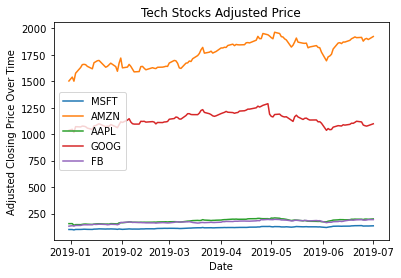

In [5]:
for symbol in symbols:
    plt.plot(stock_data['Adj Close'].index,stock_data['Adj Close'][symbol])
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")
plt.legend(symbols,loc = 6)
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

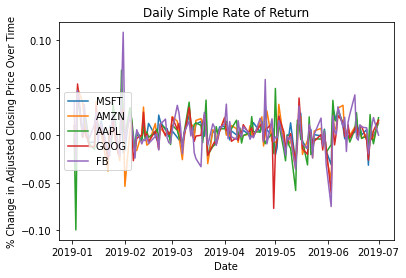

In [6]:
for symbol in symbols:
    plt.plot(stock_data['Adj Close'].index,stock_data['Adj Close'][symbol].pct_change())
plt.xlabel("Date")
plt.ylabel("% Change in Adjusted Closing Price Over Time")
plt.title("Daily Simple Rate of Return")
plt.legend(symbols,loc = 6)
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

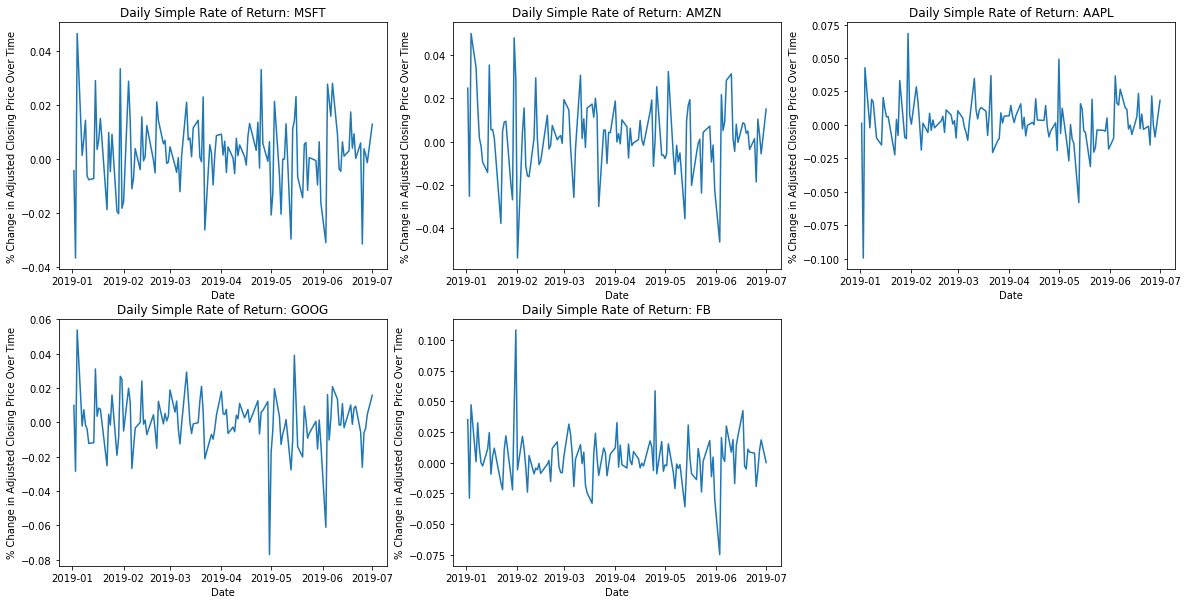

In [7]:
hspace = 0.8
wspace = 1
width = 20
height = 10
plt.figure(figsize = (width,height))
for i in range(len(symbols)):
    plt.subplot(2,3,i+1)
    plt.plot(stock_data['Adj Close'].index,stock_data['Adj Close'][symbols[i]].pct_change())
    plt.xlabel("Date")
    plt.ylabel("% Change in Adjusted Closing Price Over Time")
    plt.title("Daily Simple Rate of Return: "+symbols[i])
#plt.subplots_adjust(hspace)
#plt.subplots_adjust(wspace)
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

       MSFT      AMZN      AAPL      GOOG        FB
0  0.002477  0.002116  0.002199  0.000596  0.003302


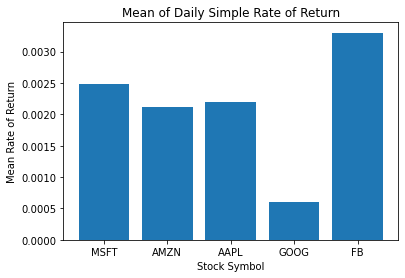

In [8]:
#Step 1
mean_rate_of_return = pd.DataFrame() # This looks a bit complicated, but all I'm doing here is creating a 
                                                    # pandas data frame which stores the mean rate of return of each stock

for symbol in symbols:
    mean_rate_of_return[symbol] = [stock_data['Adj Close'][symbol].pct_change().mean()] #calculates the mean of daily returns for each stock and stores in the appropriate column
print(mean_rate_of_return) 

#Step 2
plt.bar(symbols,mean_rate_of_return.iloc[0]) # creates a bar graph of mean rates of return for all 5 stocks
plt.xlabel("Stock Symbol")
plt.ylabel("Mean Rate of Return")
plt.title("Mean of Daily Simple Rate of Return")
plt.show()

# Step 3: Based on mean rate of return Facebook (FB) is the best option to invest in, since it has the highest mean rate of return

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

       MSFT      AMZN      AAPL      GOOG        FB
0  0.000189  0.000282  0.000342  0.000257  0.000413


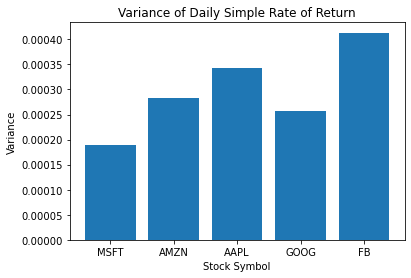

In [10]:
#Step 1
var_rate_of_return = pd.DataFrame() # This looks a bit complicated, but all I'm doing here is creating a 
                                                    # pandas data frame which stores the variance of return of each stock

for symbol in symbols:
    var_rate_of_return[symbol] = [stock_data['Adj Close'][symbol].pct_change().var()] #calculates the variance of daily returns for each stock and stores in the appropriate column
print(var_rate_of_return) 
#Step 2
plt.bar(symbols,var_rate_of_return.iloc[0]) # creates a bar graph of variance of rates of return for all 5 stocks
plt.xlabel("Stock Symbol")
plt.ylabel("Variance")
plt.title("Variance of Daily Simple Rate of Return")
plt.show()
#Step 3: Facebook has the highest variance and is therefore, the riskiest stock to invest in

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

       MSFT      AMZN      AAPL      GOOG       FB
0  0.013761  0.016798  0.018501  0.016025  0.02033


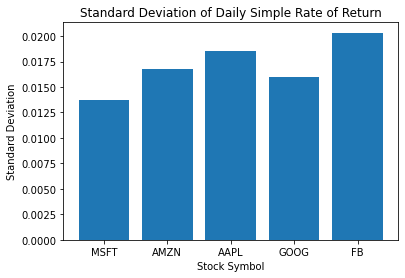

In [12]:
#Step 1
stddev_rate_of_return = pd.DataFrame() # This looks a bit complicated, but all I'm doing here is creating a 
                                                    # pandas data frame which stores the standard deviation of return of each stock

for symbol in symbols:
    stddev_rate_of_return[symbol] = [stock_data['Adj Close'][symbol].pct_change().std()] #calculates the standard deviation of daily returns for each stock and stores in the appropriate column
print(stddev_rate_of_return) 
#Step 2
plt.bar(symbols,stddev_rate_of_return.iloc[0]) # creates a bar graph of standard deviation of rates of return for all 5 stocks
plt.xlabel("Stock Symbol")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Daily Simple Rate of Return")
plt.show()
#Step 3: Facebook has the highest standard deviation and is therefore, the riskiest stock to invest in

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [17]:
covariance_matrix = stock_data['Adj Close'].pct_change().cov()
print(covariance_matrix)

Symbols      MSFT      AMZN      AAPL      GOOG        FB
Symbols                                                  
MSFT     0.000189  0.000166  0.000166  0.000140  0.000124
AMZN     0.000166  0.000282  0.000188  0.000194  0.000198
AAPL     0.000166  0.000188  0.000342  0.000169  0.000163
GOOG     0.000140  0.000194  0.000169  0.000257  0.000206
FB       0.000124  0.000198  0.000163  0.000206  0.000413


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.